In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pipe_util2

In [2]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cosine
import math 
from numpy.linalg import norm
from matplotlib import animation
from os import listdir
from skimage.io import imread, imsave
import imageio
import pandas as pd
import seaborn as sns
import os

import math
import numpy as np
from scipy.spatial.distance import cosine
from numpy.linalg import norm
import scipy.stats as stats

import pipe_util2

In [3]:
def img_crop(inpath, reduce = 300):
    
    """
    Input: folder contains imgs.
    
    Output:
    """
    inpath = pipe_util2.folder_verify(inpath)
    files = pipe_util2.folder_file_num(inpath, ".png")
    path = pipe_util2.create_folder(inpath[:-1]+"_crop/")
    
    for f in files:
        img = imread(f)
        x = img.shape[0]
        y = img.shape[1]
        name = os.path.basename(f)
        
        img = img[reduce:x-reduce, reduce:y-reduce]
        imsave(inpath[:-1]+"_crop/"+name, img)
    
    print("Images are croped.")
    return path
        

In [4]:
def d_s_calc(df):
    # tumor center displacement from center
    s = ((df.x.mean()-128)**2+(df.y.mean()-128)**2)**0.5
    s = np.round(s, 2)

    # -----------------------------------------------------

    # average single cell displacment from center
    d = (((df.x-128)**2+(df.y-128)**2)**0.5).mean()
    d = np.round(d, 2)
    d_std = (((df.x-128)**2+(df.y-128)**2)**0.5).std()
    d_std = np.round(d_std, 2)
    return d, d_std, s

from scipy.spatial import ConvexHull

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def area_calc(df):
    # tumor area with convex hall
    points = np.array([df.x, df.y]).T
    hull = ConvexHull(points)
    vetices = points[hull.vertices]
    ara = PolyArea(points[hull.vertices,0],points[hull.vertices,1])
    ara_frac = ara/256/256.
    #ara_frac = np.round(ara_frac, 2)
    return ara_frac
            
def time_series(folder, start, end):
    folder = pipe_util2.folder_verify(folder)
    files = pipe_util2.folder_file_num(folder, "txt")[start:end]
    
    d_time = []
    d_std_time = []
    s_time = []
    area_time = []
    rac_time = []
    ang_std_time = []
    ang_mean_time = []
    
    i = 0
    while i<len(files):
        df = pd.read_csv(files[i])
        #print(df.columns)
        d, d_std, s = d_s_calc(df)
        ara_frac = area_calc(df)

        px = df.x_self_polarity
        py = df.y_self_polarity
        ang = np.arctan2(py, px)
        ang_std = np.round(np.std(ang),2)
        ang_mean = np.round(np.mean(ang),2)

        d_time.append(d)
        d_std_time.append(d_std)
        s_time.append(s)
        area_time.append(ara_frac)
        rac_time.append(df.rac.mean())

        ang_std_time.append(ang_std)
        ang_mean_time.append(ang_mean)
        
        f_avg = df.f.mean()
        f_max = df.f.max()
        i = i+1
        
    df = pd.DataFrame({
        "d_time": d_time,
        "d_std_time": d_std_time,
        "s_time": s_time,
        "area_time": area_time,
        "rac_time": rac_time,
        "ang_std_time": ang_std_time,
        "ang_mean_time": ang_mean_time,
        
        "f_avg": f_avg,
        "f_max": f_max
        
    })
    return df

In [5]:
folder = "akt_selected/"

fpp50_r_folder = "akt_selected/scan_iteration_22_fpp50_r/06012022_formal5_hope_force_fpp_akt/"
fpp50_r = time_series(fpp50_r_folder, 0, 270)

fpp130_r_folder = "akt_selected/scan_iteration_139_fpp130_r/03292022_formal5_hope_force_fpp_akt/"
fpp130_r = time_series(fpp130_r_folder, 0, 270)

fpp130_d_folder = "akt_selected/scan_iteration_150_fpp130_d/03292022_formal5_hope_force_fpp_akt/"
fpp130_d = time_series(fpp130_d_folder, 0, 270)

fpp130_n_folder = "akt_selected/scan_iteration_186_fpp130_n/03292022_formal5_hope_force_fpp_akt/"
fpp130_n = time_series(fpp130_n_folder, 0, 270)

fpp400_d_folder = "akt_selected/scan_iteration_143_fpp400_d/06012022_formal5_hope_force_fpp_akt/"
fpp400_d = time_series(fpp400_d_folder, 0, 270)

fpp400_n_folder = "akt_selected/scan_iteration_137_fpp400_n/06012022_formal5_hope_force_fpp_akt/"
fpp400_n = time_series(fpp400_n_folder, 0, 270)

akt_selected/scan_iteration_22_fpp50_r/06012022_formal5_hope_force_fpp_akt/ has 379 files
akt_selected/scan_iteration_139_fpp130_r/03292022_formal5_hope_force_fpp_akt/ has 379 files
akt_selected/scan_iteration_150_fpp130_d/03292022_formal5_hope_force_fpp_akt/ has 379 files
akt_selected/scan_iteration_186_fpp130_n/03292022_formal5_hope_force_fpp_akt/ has 379 files
akt_selected/scan_iteration_143_fpp400_d/06012022_formal5_hope_force_fpp_akt/ has 379 files
akt_selected/scan_iteration_137_fpp400_n/06012022_formal5_hope_force_fpp_akt/ has 379 files


In [6]:
fpp400_n.head(3)

,d_time,d_std_time,s_time,area_time,rac_time,ang_std_time,ang_mean_time,f_avg,f_max
0,29.10,10.71,3.76,0.081637,10.0,1.93,0.15,94.669644,149.371143
1,29.13,10.72,3.75,0.081828,10.0,1.87,-0.01,94.669644,149.371143
2,29.13,10.72,3.74,0.081760,10.0,1.90,0.05,94.669644,149.371143


In [7]:
import matplotlib.pylab as pl

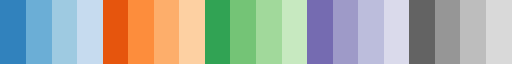

In [8]:
pl.cm.tab20c

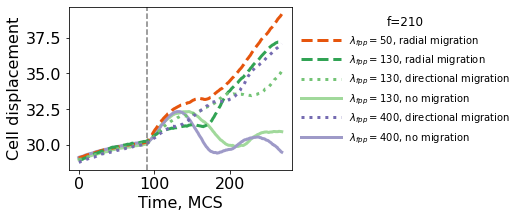

In [9]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(111)

colors = plt.cm.rainbow(np.linspace(0.1,1,2))
plt.plot(fpp50_r.d_time, "--", c = pl.cm.tab20c(0+4), lw = 3, label = r"$\lambda_{fpp}=50$, radial migration")

plt.plot(fpp130_r.d_time, "--", c = pl.cm.tab20c(4+4), lw = 3, label = r"$\lambda_{fpp}=130$, radial migration")
plt.plot(fpp130_d.d_time, ":", c = pl.cm.tab20c(5+4), lw = 3, label = r"$\lambda_{fpp}=130$, directional migration")
plt.plot(fpp130_n.d_time, "-", c = pl.cm.tab20c(6+4), lw = 3, label = r"$\lambda_{fpp}=130$, no migration", zorder=0)

plt.plot(fpp400_d.d_time, ":", c = pl.cm.tab20c(8+4), lw = 3, label = r"$\lambda_{fpp}=400$, directional migration")
plt.plot(fpp400_n.d_time, "-", c = pl.cm.tab20c(9+4), lw = 3, label = r"$\lambda_{fpp}=400$, no migration", zorder=0)

plt.axvline(x=90, c = "grey", ls = "--")

ax.tick_params(axis='x', labelsize=16)  # only affects
ax.tick_params(axis='y', labelsize=16)  # tick labels

plt.xlabel("Time, MCS", fontsize = 16)
plt.legend(fontsize = 10, title=r"f=210", 
           frameon=False, handlelength=4,
           title_fontsize='large', bbox_to_anchor=(1, 1))
plt.ylabel("Cell displacement", fontsize = 16)
plt.savefig(folder+"Cell displacement.pdf", dpi = 200, bbox_inches = "tight")

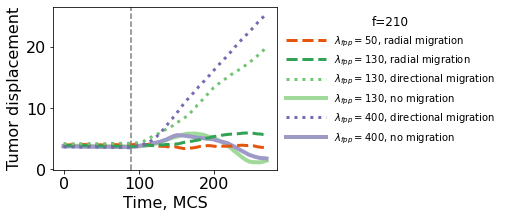

In [10]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(111)

colors = plt.cm.rainbow(np.linspace(0.1,1,2))
plt.plot(fpp50_r.s_time, "--", c = pl.cm.tab20c(0+4), lw = 3, label = r"$\lambda_{fpp}=50$, radial migration")

plt.plot(fpp130_r.s_time, "--", c = pl.cm.tab20c(4+4), lw = 3, label = r"$\lambda_{fpp}=130$, radial migration")
plt.plot(fpp130_d.s_time, ":", c = pl.cm.tab20c(5+4), lw = 3, label = r"$\lambda_{fpp}=130$, directional migration")
plt.plot(fpp130_n.s_time, "-", c = pl.cm.tab20c(6+4), lw = 4, label = r"$\lambda_{fpp}=130$, no migration", zorder=0)

plt.plot(fpp400_d.s_time, ":", c = pl.cm.tab20c(8+4), lw = 3, label = r"$\lambda_{fpp}=400$, directional migration")
plt.plot(fpp400_n.s_time, "-", c = pl.cm.tab20c(9+4), lw = 4, label = r"$\lambda_{fpp}=400$, no migration", zorder=0)

plt.axvline(x=90, c = "grey", ls = "--")

ax.tick_params(axis='x', labelsize=16)  # only affects
ax.tick_params(axis='y', labelsize=16)  # tick labels

plt.xlabel("Time, MCS", fontsize = 16)
plt.legend(fontsize = 10, title=r"f=210", 
           frameon=False, handlelength=4,
           title_fontsize='large', bbox_to_anchor=(1, 1))
plt.ylabel("Tumor displacement", fontsize = 16)
plt.savefig(folder+"Tumor displacement.pdf", dpi = 200, bbox_inches = "tight")

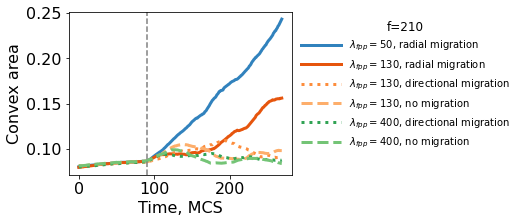

In [11]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(111)

colors = plt.cm.rainbow(np.linspace(0.1,1,2))
plt.plot(fpp50_r.area_time, "-", c = pl.cm.tab20c(0), lw = 3, label = r"$\lambda_{fpp}=50$, radial migration")

plt.plot(fpp130_r.area_time, "-", c = pl.cm.tab20c(4), lw = 3, label = r"$\lambda_{fpp}=130$, radial migration")
plt.plot(fpp130_d.area_time, ":", c = pl.cm.tab20c(5), lw = 3, label = r"$\lambda_{fpp}=130$, directional migration")
plt.plot(fpp130_n.area_time, "--", c = pl.cm.tab20c(6), lw = 3, label = r"$\lambda_{fpp}=130$, no migration")

plt.plot(fpp400_d.area_time, ":", c = pl.cm.tab20c(8), lw = 3, label = r"$\lambda_{fpp}=400$, directional migration")
plt.plot(fpp400_n.area_time, "--", c = pl.cm.tab20c(9), lw = 3, label = r"$\lambda_{fpp}=400$, no migration")

plt.axvline(x=90, c = "grey", ls = "--")

ax.tick_params(axis='x', labelsize=16)  # only affects
ax.tick_params(axis='y', labelsize=16)  # tick labels

plt.xlabel("Time, MCS", fontsize = 16)
plt.legend(fontsize = 10, title=r"f=210", 
           frameon=False,handlelength=4,
           title_fontsize='large', bbox_to_anchor=(1, 1))
plt.ylabel("Convex area", fontsize = 16)
plt.savefig(folder+"Convex area.pdf", dpi = 200, bbox_inches = "tight")

# All solide lines

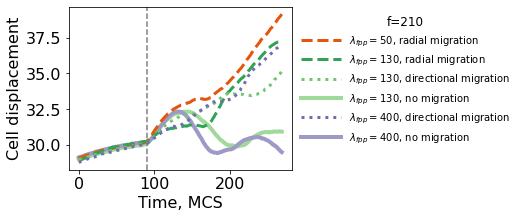

In [12]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(111)

colors = plt.cm.rainbow(np.linspace(0.1,1,2))
plt.plot(fpp50_r.d_time, "--", c = pl.cm.tab20c(0+4), lw = 3, label = r"$\lambda_{fpp}=50$, radial migration")

plt.plot(fpp130_r.d_time, "--", c = pl.cm.tab20c(4+4), lw = 3, label = r"$\lambda_{fpp}=130$, radial migration")
plt.plot(fpp130_d.d_time, ":", c = pl.cm.tab20c(5+4), lw = 3, label = r"$\lambda_{fpp}=130$, directional migration")
plt.plot(fpp130_n.d_time, "-", c = pl.cm.tab20c(6+4), lw = 4, label = r"$\lambda_{fpp}=130$, no migration", zorder=0)

plt.plot(fpp400_d.d_time, ":", c = pl.cm.tab20c(8+4), lw = 3, label = r"$\lambda_{fpp}=400$, directional migration")
plt.plot(fpp400_n.d_time, "-", c = pl.cm.tab20c(9+4), lw = 4, label = r"$\lambda_{fpp}=400$, no migration", zorder=0)

plt.axvline(x=90, c = "grey", ls = "--")

ax.tick_params(axis='x', labelsize=16)  # only affects
ax.tick_params(axis='y', labelsize=16)  # tick labels

plt.xlabel("Time, MCS", fontsize = 16)
plt.legend(fontsize = 10, title=r"f=210", 
           frameon=False, handlelength=4,
           title_fontsize='large', bbox_to_anchor=(1, 1))
plt.ylabel("Cell displacement", fontsize = 16)
plt.savefig(folder+"Cell displacement.pdf", dpi = 200, bbox_inches = "tight")